In [55]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
import xgboost as xgb
from sklearn import metrics
from lightgbm import LGBMClassifier

import lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats

In [58]:
df2021 = pd.read_csv('SRER21_dataset_v1.csv', na_values='?').dropna()
df2017 = pd.read_csv('SRER_2017_training_bi.csv', na_values='?').dropna()
combinedDf = pd.concat([df2021,df2017])

dfFinal = combinedDf.replace('woody', 1)
dfFinal = dfFinal.replace('non-woody', 0)
print(dfFinal.dtypes)
dfFinal.head()

OID_              int64
Id                int64
gridcode          int64
Shape_Length    float64
Shape_Area      float64
CH_mean         float64
ARVI_mean       float64
ARVI_med        float64
ARVI_max        float64
EVI_mean        float64
EVI_med         float64
EVI_max         float64
NDVI_mean       float64
NDVI_med        float64
NDVI_max        float64
SAVI_mean       float64
SAVI_med        float64
SAVI_max        float64
Veg_class         int64
dtype: object


,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,2,2,2,20.4,2.38,1.000000,0.273945,0.273945,0.273945,0.323257,0.323257,0.323257,0.428208,0.428208,0.428208,0.311936,0.311936,0.311936,1
1,3,3,3,8.2,1.32,1.000000,0.530156,0.530156,0.530156,0.460513,0.460513,0.460513,0.611745,0.611745,0.611745,0.416492,0.416492,0.416492,1
2,4,4,4,55.8,24.43,0.920000,0.477979,0.501013,0.616707,0.381095,0.384718,0.447304,0.576437,0.596638,0.673767,0.359786,0.364317,0.414173,1
3,5,5,5,15.2,1.88,1.000000,0.342945,0.342945,0.342945,0.346714,0.346714,0.346714,0.468738,0.468738,0.468738,0.323907,0.323907,0.323907,1
4,6,6,6,27.2,9.29,0.142857,0.044382,-0.008903,0.265536,0.181714,0.147391,0.315684,0.223522,0.178629,0.412030,0.177739,0.147325,0.299311,0


1.5.0


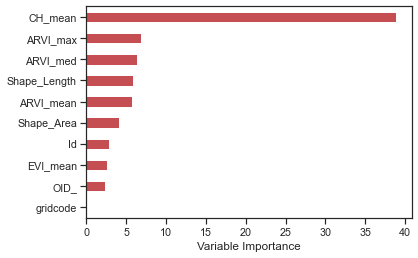

roc_auc_score 0.8977261178861788


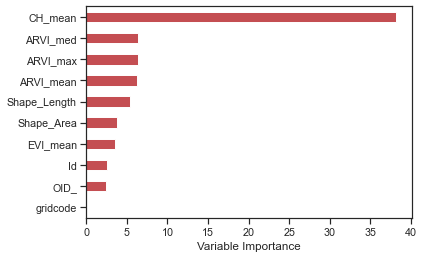

roc_auc_score 0.8904884724707864


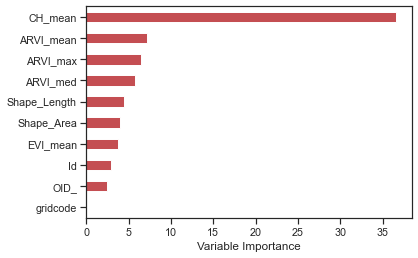

roc_auc_score 0.9028922651879343


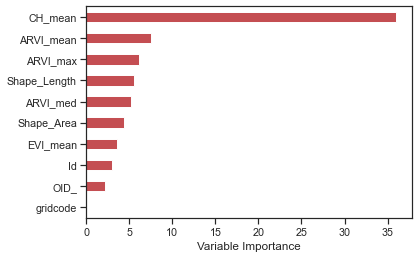

roc_auc_score 0.8961171467758662


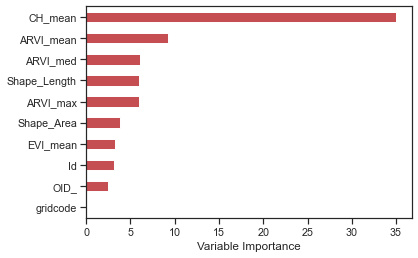

roc_auc_score 0.88631592265023
---Run time is 9.217101600000206 seconds ---

Accuracy of each fold: 
 [0.812862669245648, 0.7939042089985486, 0.8234155781325593, 0.8137397194000967, 0.7963231736816643]

Avg accuracy : 
0.8080490698917033

Std of accuracy : 
0.011218355830506297


In [61]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

# check xgboost version
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
print(xgboost.__version__)
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
# Create the Extreme GBM
model = XGBClassifier(n_estimators=100, learning_rate = 0.1,use_label_encoder =False,verbose=None,
                max_depth = 5, eval_metric='logloss')
    
from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(dfFinal):
     
    X_train , X_test = dfFinal.iloc[train_index,:-1], dfFinal.iloc[test_index,:-1]
    y_train , y_test = dfFinal.iloc[train_index,-1], dfFinal.iloc[test_index,-1]
    
    
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    # y values used only for accuracy
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
        
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    plt.show()
    #plt.savefig('plot1.png')
    
    ##################################################
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    print("roc_auc_score", roc_auc_score(y_test, pred_prob))
    
    # calculate the fpr and tpr for all thresholds of the classification
    #fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob)
    #roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    #import matplotlib.pyplot as plt
    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([-0.05, 1])
    #plt.ylim([0, 1.05])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.show()
    ##################################################
    
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

In [60]:
# https://catboost.ai/en/docs/concepts/python-quickstart
import catboost as cb
from catboost import CatBoostClassifier


print ('catboost version', cb.__version__)

catboost version 1.0.6


---Run time is 5.2802905999997165 seconds ---

Accuracy of each fold: 
 [0.8060928433268859, 0.7929366231253023, 0.8059990324141267, 0.8050314465408805, 0.7890662796323173]

Avg accuracy : 
0.7998252450079025

Std of accuracy : 
0.007317259342429209


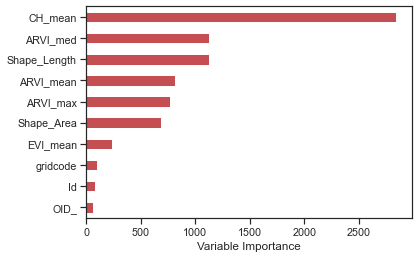

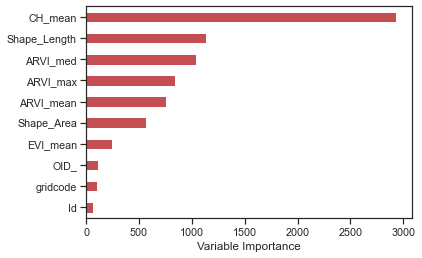

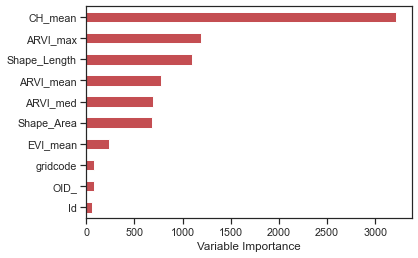

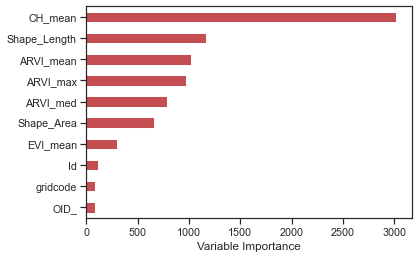

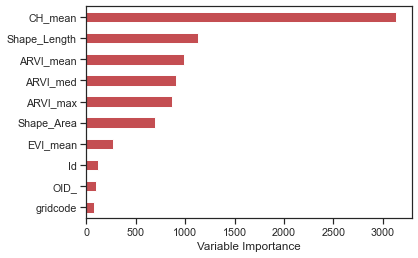

In [62]:
#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(dfFinal):
    
    X_train , X_test = dfFinal.iloc[train_index,:-1], dfFinal.iloc[test_index,:-1]
    y_train , y_test = dfFinal.iloc[train_index,-1], dfFinal.iloc[test_index,-1]
    
    # Create CatBoost model
    model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss')
    # train the model
    model.fit(X_train, y_train, verbose=False)
    
    # make the prediction using the resulting model
    pred_values = model.predict(X_test)
    #preds_proba = model.predict_proba(test_data)
    #print("class = ", preds_class)
    #print("proba = ", preds_proba)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

[1]	training's binary_logloss: 0.633885	valid_0's binary_logloss: 0.637743
[2]	training's binary_logloss: 0.603655	valid_0's binary_logloss: 0.608329
[3]	training's binary_logloss: 0.578025	valid_0's binary_logloss: 0.583816
[4]	training's binary_logloss: 0.555061	valid_0's binary_logloss: 0.56252
[5]	training's binary_logloss: 0.535754	valid_0's binary_logloss: 0.544005
[6]	training's binary_logloss: 0.518038	valid_0's binary_logloss: 0.527796
[7]	training's binary_logloss: 0.503084	valid_0's binary_logloss: 0.514463
[8]	training's binary_logloss: 0.488765	valid_0's binary_logloss: 0.501345
[9]	training's binary_logloss: 0.476626	valid_0's binary_logloss: 0.489709
[10]	training's binary_logloss: 0.46595	valid_0's binary_logloss: 0.480107
[11]	training's binary_logloss: 0.455325	valid_0's binary_logloss: 0.471304
[12]	training's binary_logloss: 0.445813	valid_0's binary_logloss: 0.464068
[13]	training's binary_logloss: 0.437249	valid_0's binary_logloss: 0.457108
[14]	training's binary_

[26]	training's binary_logloss: 0.367246	valid_0's binary_logloss: 0.423711
[27]	training's binary_logloss: 0.363859	valid_0's binary_logloss: 0.421865
[28]	training's binary_logloss: 0.360629	valid_0's binary_logloss: 0.419103
[29]	training's binary_logloss: 0.357796	valid_0's binary_logloss: 0.41787
[30]	training's binary_logloss: 0.354594	valid_0's binary_logloss: 0.416298
[31]	training's binary_logloss: 0.351577	valid_0's binary_logloss: 0.414044
[32]	training's binary_logloss: 0.348786	valid_0's binary_logloss: 0.41321
[33]	training's binary_logloss: 0.346104	valid_0's binary_logloss: 0.41138
[34]	training's binary_logloss: 0.343447	valid_0's binary_logloss: 0.410556
[35]	training's binary_logloss: 0.341252	valid_0's binary_logloss: 0.409056
[36]	training's binary_logloss: 0.338765	valid_0's binary_logloss: 0.408874
[37]	training's binary_logloss: 0.336612	valid_0's binary_logloss: 0.408032
[38]	training's binary_logloss: 0.334652	valid_0's binary_logloss: 0.40762
[39]	training's 

[1]	training's binary_logloss: 0.634617	valid_0's binary_logloss: 0.635349
[2]	training's binary_logloss: 0.604108	valid_0's binary_logloss: 0.606693
[3]	training's binary_logloss: 0.577847	valid_0's binary_logloss: 0.582429
[4]	training's binary_logloss: 0.555185	valid_0's binary_logloss: 0.561295
[5]	training's binary_logloss: 0.535478	valid_0's binary_logloss: 0.542381
[6]	training's binary_logloss: 0.518166	valid_0's binary_logloss: 0.526946
[7]	training's binary_logloss: 0.502566	valid_0's binary_logloss: 0.513011
[8]	training's binary_logloss: 0.488665	valid_0's binary_logloss: 0.500907
[9]	training's binary_logloss: 0.476415	valid_0's binary_logloss: 0.490577
[10]	training's binary_logloss: 0.464874	valid_0's binary_logloss: 0.480945
[11]	training's binary_logloss: 0.454664	valid_0's binary_logloss: 0.47219
[12]	training's binary_logloss: 0.445453	valid_0's binary_logloss: 0.464548
[13]	training's binary_logloss: 0.436904	valid_0's binary_logloss: 0.457586
[14]	training's binary

[28]	training's binary_logloss: 0.359919	valid_0's binary_logloss: 0.419711
[29]	training's binary_logloss: 0.356328	valid_0's binary_logloss: 0.418181
[30]	training's binary_logloss: 0.353025	valid_0's binary_logloss: 0.417161
[31]	training's binary_logloss: 0.350236	valid_0's binary_logloss: 0.416
[32]	training's binary_logloss: 0.347581	valid_0's binary_logloss: 0.414655
[33]	training's binary_logloss: 0.344772	valid_0's binary_logloss: 0.414014
[34]	training's binary_logloss: 0.342264	valid_0's binary_logloss: 0.413205
[35]	training's binary_logloss: 0.339738	valid_0's binary_logloss: 0.412234
[36]	training's binary_logloss: 0.337455	valid_0's binary_logloss: 0.411332
[37]	training's binary_logloss: 0.335499	valid_0's binary_logloss: 0.410945
[38]	training's binary_logloss: 0.333231	valid_0's binary_logloss: 0.41051
[39]	training's binary_logloss: 0.331168	valid_0's binary_logloss: 0.409927
[40]	training's binary_logloss: 0.329212	valid_0's binary_logloss: 0.409574
[41]	training's 

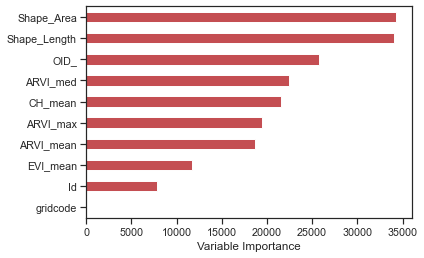

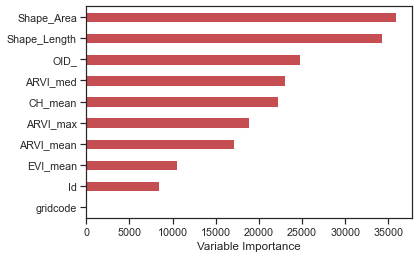

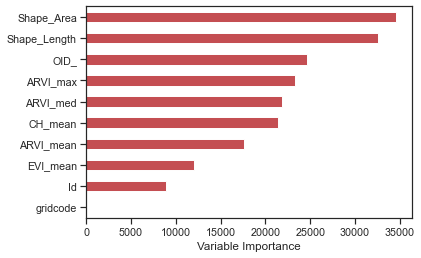

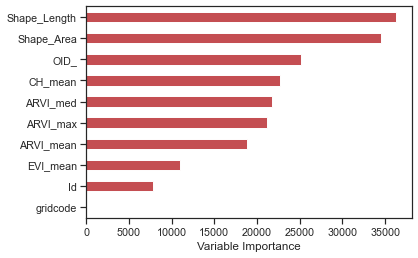

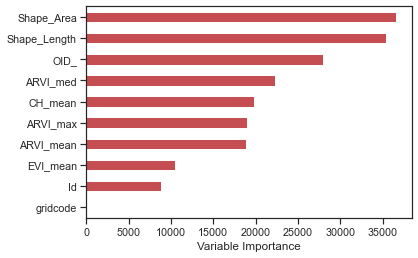

In [63]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm

#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(dfFinal):
    
    X_train , X_test = dfFinal.iloc[train_index,:-1], dfFinal.iloc[test_index,:-1]
    y_train , y_test = dfFinal.iloc[train_index,-1], dfFinal.iloc[test_index,-1]
    
    # Create the LightGBM data containers
    model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss')

    pred_values = model.predict(X_test)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))